## Learning Objectives 

By the end of this class, you should be able to...

- Introduce a classifier, that seperates different classes we have in our dataset, with a maximum margin known as a Support Vector Machine (SVM)

- Modify the SVM for datasets that are not linearly separable

- Adjust the SVM for an unbalanced dataset

## Support Vector Machine (SVM)

- SVM is a supervised machine learning model for classification tasks. It's really good at doing both classification and regression simultaneously. 

- If you have a lot of data that needs to be classified, an SVM can help you achieve that

- For two dimensions (when we have two features), assume the target has two classes. The SVM will obtain the best line that seperates the data into two groups 

<img src="Images/svm_1.png" width="300" height="300">

<img src="Images/best_margin.png" width="300" height="300">

##  Question: which one of the above lines is the best choice for separating the data? Why?

## What are Support Vectors in SVM?

**Support vectors** are the datapoints that lie closest to the decision boundary (best line, seen in red below)

<img src="Images/svm_2.png" width="300" height="300">

## Brain Health

We have medical data on brain health through the following [Brain Health Dataset](./Datasets/SVM_Dataset1.csv)

- Two features (X1 and X2 columns) are given that are releted to brain chemistry:

    - Serotonin 
    
    - Dopamine
    
- The target (y column) shows brain health by indicating having (-1) or not having (1) depression.

    - 1 means subject does not have depression
    
    - -1 means subject does have depression

In [22]:
import pandas as pd

df=pd.read_csv('SVM_Dataset1.csv', index_col=0)

In [23]:
print(df)

,X1,X2,y
0,2.947814,6.626878,1
1,2.530388,7.785050,1
2,3.566991,5.651046,1
3,3.156983,5.467077,1
4,2.582346,4.457777,-1
5,2.155826,6.222343,-1
6,3.273418,3.520687,-1


### Activity: Lets build our X_train and Y_train arrays

**Complete this activity groups of 3:**

**Hint:** We'll need to use numpy here, as well as the [zip function](https://www.geeksforgeeks.org/create-pandas-dataframe-from-lists-using-zip/)

In [24]:
import numpy as np
X1=df['X1']
X2=df['X2']
X_train=np.array(list(zip(X1,X2)))

print(X_train)

array([[2.947814, 6.626878],
       [2.530388, 7.78505 ],
       [3.566991, 5.651046],
       [3.156983, 5.467077],
       [2.582346, 4.457777],
       [2.155826, 6.222343],
       [3.273418, 3.520687]])

In [25]:
y_train=df['y'].values

print(y_train)

[ 1  1  1  1 -1 -1 -1]


### Activity: Assign color and label to each target class

**Complete this activity groups of 3:**

**Hint:** To do this, build two lists whose color/label values match with the values of the `y_train` array at the corresponding indices.

In [26]:
color_ls = []
# if y == 1, then the value at the same index in color_ls will be 'b'
# otherwise, it will be 'r'
for k in y_train:
    if k == 1:
        color_ls.append('b')
    else:
        color_ls.append('r')

print(color_ls)
        

['b', 'b', 'b', 'b', 'r', 'r', 'r']

In [27]:
label = []
# if y == 1, then the value at the same index in label will be 'H'
# otherwise, it will be 'NH'
for k in y_train:
    if k == 1:
        label.append('H')
    else:
        label.append('NH')

print(label)

['H', 'H', 'H', 'H', 'NH', 'NH', 'NH']

### Activity: Create a scatter plot of data with labels

**Complete this activity groups of 3:**

**Hints:**

- There's some functions in [matplotlib.pyplot](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.html) that will help us here.
- How can the [enumerate function](https://www.geeksforgeeks.org/enumerate-in-python/) help us here?

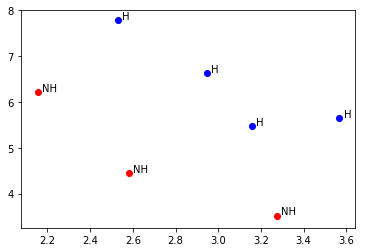

In [28]:
import matplotlib.pyplot as plt

# k is our index, (i,j) are our Serotonin and Dopamine pairings.
# For example, here are the values on the first iteration of the loop:
# k == 0, (i, j) == (2.947814, 6.626878)
for k, (i,j) in enumerate(X_train):
    # add the datapoint to a scatter plot,
    # using the k'th color in colors_ls
    plt.scatter(i, j, c = color_ls[k])
    # 0.02 to the right and above the point,
    # add the k'th text label in label
    plt.text(i+0.02, j+0.02, label[k])

## How to obtain the best line using sklearn

**Code-along with Milad**

sklearn has an [SVM module](https://scikit-learn.org/stable/modules/svm.html#svm) you can import that will help you find the best fit line. Look into how the `SVC` and `fit` functions can help you

In [29]:
from sklearn import svm

# svm_classifier = svm.SVC(kernel='poly',C=1, degree=2)

# We want to use a linear classification
svm_classifier = svm.SVC(kernel='linear', C=10)
# find the best fit line
svm_classifier.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
# Helper function to plot the best fit line,
# as well as marking the closest data points to the line,
# through dotted lines (margins)
def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, colors='b', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    

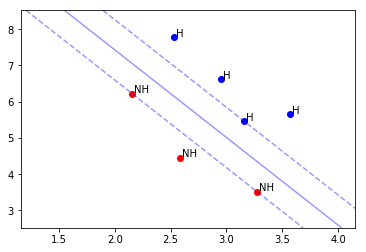

In [31]:
# pass in the trained model and data points,
# and plot the best fit line + margins
plot_decision_boundary(svm_classifier, X_train, y_train)

# plot data points + color/labels
for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])

In [32]:
# Number of Support Vectors for each class:

svm_classifier.n_support_

array([2, 1], dtype=int32)

In [33]:
# What are those Support Vectors:

svm_classifier.support_vectors_

array([[2.155826, 6.222343],
       [3.273418, 3.520687],
       [3.156983, 5.467077]])

In [34]:
# Obtain the slope (weight) and intercept for the best fit line equation: 

# a + b
weight=svm_classifier.coef_
# c
intercept=svm_classifier.intercept_
print(weight)
print(intercept)

[[2.90336685 1.20121959]]
[-14.73321143]


## From the above weight and intecept results, we can say the best line is:

$ax_1+bx_2+c =0$, where $a = 2.90336685$, $b = 1.20121959$ and $c = -14.73321143$

## Activity: Check that the points (3, 5) and (2, 7.5) are very close to the best line:

- Use `a`, `b`, and `c` that we just calculated

In [44]:
print(weight[0][0]*3+weight[0][1]*5+intercept[0])
print(weight[0][0]*2+weight[0][1]*7.5+intercept[0])

-0.017012931258699737
0.08266919494858627


## Activity: Am I healthy?

- I went to a medical lab and they measured my Serotonin and Dopamine which was 3 and 6, respectively.
- Can we use the SVM classifier to see if I am deppressed?

In [174]:
svm_classifier.predict([[3,6]])

array([1])

Good, I am not depressed :)

## SVM Training For Non-Linearly Separable Data

Based on the [SVM_Dataset2 dataset](./Datasets/SVM_Dataset2.csv), it is possible that we can not find a _line_ that separates the two classes.


<img src="Images/svm_5.png" width="500" height="500">

## Solution: Use Polynomial as the Kernel

<img src="Images/svm_3.png" width="500" height="500">

## What if even polynomial can not separate the two groups?


<img src="Images/why_rbf_kernel.png" width="500" height="500">

## Solution: Use Radial Basis Function (RBF) as the Kernel

<img src="Images/svm_6.png" width="500" height="500">

## Kernels in SVM and their parameters:

Type of kernels:

1. Linear
1. Polynomial
1. RBF (Gaussian)

There are two parameters for each of these:

- Gamma (for RBF only). This is the "spread" of the decision region (kernel)
- C (for all of them). This is the threshold for misclassifying data.

Read [this article on SVM parameters](https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/) for more information! (Optional)

## What if the classes are unbalanced?

Let's go through this example together to learn about assigning **class weights** for SVMs:
http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html


## Activity: Obtain which line (black or red) from the previous example will have the lowest error

**Complete this activity in groups of 3**

**Hints:**

Follow these steps:
1. Train two SVM models: one with class weights, and one without
1. Pass the dataset into your SVM models
1. Compare the model predictions with known classes
1. Report which one has the lowest mistakes (error rate)

**Use the following code to get started (includes the dataset to use:)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

## Resource: All the code we used for SVM_Dataset1:

array([[2.155826, 6.222343],
       [3.273418, 3.520687],
       [3.156983, 5.467077]])

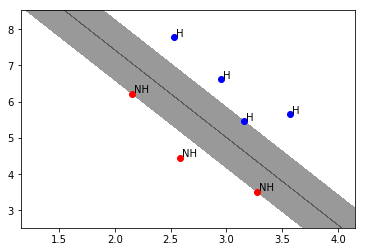

In [17]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt

df=pd.read_csv('SVM_Dataset1.csv', index_col=0)


X1=df['X1']
X2=df['X2']

X_train=np.array(list(zip(X1,X2)))
y_train=df['y'].values


svm_classifier = svm.SVC(kernel='linear',C=10)

# svm_classifier = svm.SVC(kernel='rbf', gamma=0.1, C=10)
svm_classifier.fit(X_train, y_train)

color_ls = []
for k in y_train:
    if k == 1:
        color_ls.append('b')
    else:
        color_ls.append('r')
color_ls

label = []
for k in y_train:
    if k == 1:
        label.append('H')
    else:
        label.append('NH')
label

def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, colors='k', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    

plot_decision_boundary(svm_classifier, X_train, y_train)

for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])
    
svm_classifier.support_vectors_

## Resource: Code for SVM_Dataset 2:

array([[ 8. , 12. ],
       [ 4. , 15. ],
       [ 5.5, 12. ],
       [13. , 10. ]])

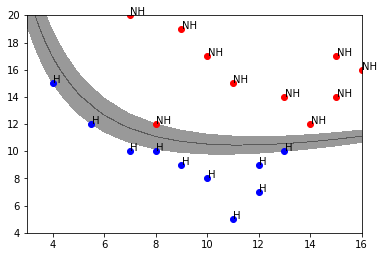

In [21]:
# Apply different SVM kernels, (linear, polynomial or RBF) to obtain the best classifier for SVM_Dataset2.csv

import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt

df=pd.read_csv('SVM_Dataset2.csv')


X1=df['x1']
X2=df['x2']

X_train=np.array(list(zip(X1,X2)))
y_train=df['y'].values

# svm_classifier = svm.SVC(kernel='linear', C=10)
#svm_classifier = svm.SVC(kernel='poly', C=10)
svm_classifier = svm.SVC(kernel='poly',C=1, degree=2)
# svm_classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)
svm_classifier.fit(X_train, y_train)

color_ls = []
for k in y_train:
    if k == 1:
        color_ls.append('b')
    else:
        color_ls.append('r')
color_ls

label = []
for k in y_train:
    if k == 1:
        label.append('H')
    else:
        label.append('NH')
label

def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max),np.arange(x2_min, x2_max))
    Z = clf.decision_function(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, colors='k', levels=[-1, 0, 1], alpha=0.4, linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    

plot_decision_boundary(svm_classifier, X_train, y_train)

for k, (i,j) in enumerate(X_train):
    plt.scatter(i, j, c = color_ls[k])
    plt.text(i+0.02, j+0.02, label[k])
    
svm_classifier.support_vectors_

## Tutorial/Article Resources
- [SVM Tutorial](https://people.revoledu.com/kardi/tutorial/Python/SVM+in+Python.html)
    - Here are the steps you will follow in the tutorial:
        - Create the dataset
        - Define the SVM model as the classifier 
        - Fit the SVM with training dataset
        - Obtain its support vectors 
        - Obtain the score of the trained SVM model
- [Article on SVM parameters](https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/)